In [8]:
import numpy as np
import cv2
from painting_author import *
import matplotlib.pyplot as plt

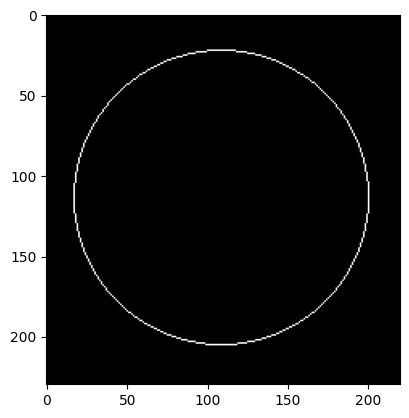

In [54]:
im = "Circle.png"
img = cv2.imread(im)
arr, image = get_contours(img)
plt.imshow(image, cmap="gray")
plt.show()
s = get_start_point(arr, mode="left-up")
c1 = get_vector_contour(arr, s, contour_len=50)

In [55]:
c1

array([  3.-31.j,   3.-10.j,   3. -7.j,   3. -6.j,   6. -9.j,  19.-20.j,
         9. -6.j,   6. -3.j,   6. -3.j,  10. -3.j,  15. -3.j,  30. +3.j,
        10. +3.j,   7. +3.j,   5. +2.j,   6. +4.j,   8. +5.j,  19.+21.j,
         3. +6.j,   3. +5.j,   2. +5.j,   3. +7.j,   2.+11.j,   1.+27.j,
        -2.+14.j,  -3. +7.j,  -2. +6.j,  -3. +5.j,  -2. +5.j,  -7. +9.j,
       -19.+18.j,  -7. +5.j,  -5. +2.j,  -5. +3.j,  -7. +2.j,  -8. +3.j,
       -30. +2.j, -12. -3.j,  -9. -2.j,  -6. -3.j,  -5. -2.j,  -5. -3.j,
        -7. -4.j, -21.-21.j,  -4. -7.j,  -3. -5.j,  -2. -5.j,  -3. -6.j,
        -2. -9.j,  -3.-12.j])

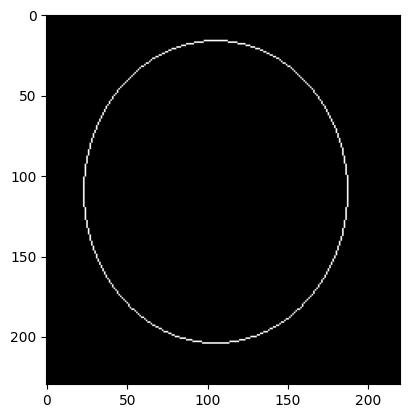

In [58]:
im = "test.png"
img = cv2.imread(im)
arr, image = get_contours(img)
plt.imshow(image, cmap="gray")
plt.show()
s = get_start_point(arr, mode="left-up")
c2 = get_vector_contour(arr, s, contour_len=50)

In [534]:
def get_c(path, mode='left-up', len=10):
    im = path
    img = cv2.imread(im)
    arr, image = get_contours(img)
    # plt.imshow(image, cmap="gray")
    # plt.show()
    s = get_start_point(arr, mode=mode)
    return get_vector_contour(arr, s, contour_len=len)
    

In [536]:
c1 = get_c("Circle.png")
c2 = get_c("test.png")
similarity(c1, c2)

(0.9949347830786432+0.010607795689341023j)

In [512]:
similarity(c1, c2)

(0.9635618789605261+0.007801944014743483j)

Домашнее задание 1 

презентация, слайд 5 

составить вектор контуры для овала и буквы А (вручную или написать программу*)  


Овал (левая точка самая, по часовой стрелке)

(1+i,1,1-i,-1-i,-1,-1+i)

Буква А (левая точка самая, по часовой стрелке)

1 - (1+i,1+i,1-i,1-i,-1+i,-2,-1-i)

2 - (1+i,1-i,-2)


Домашнее задание 2.

Слайд 13 написать программу для рассчетов по оставшимся примерам

In [513]:
def dot(x, y):
    return np.vdot(x, y)

def NSP(x, y):
    return dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)) 

In [514]:
# начальная точка левая верхняя
# элементарный вектор - примерно 1 см

g1=(1, 1-1j, -1, -1,-1, 1+1j)
print("same", NSP(g1, g1))

g2=(-1j, -1-1j, 1j, 1j, 1j, 1-1j)
print("90", NSP(g2, g1))

g3=(-1, -1+1j, 1, 1, 1, -1-1j)
print("180", NSP(g3, g1))

g4=(1j, 1+1j, -1j, -1j, -1j, -1+1j)
print("270", NSP(g4, g1))

same (0.9999999999999998+0j)
90 0.9999999999999998j
180 (-0.9999999999999998+0j)
270 -0.9999999999999998j


In [515]:
# Домашнее задание 3
# Слайд 17  посчитать нсп для оранжевых и зеленых точек разных фигур
# и для разных начальных точек одной фигуры

# по часовой
# оранжевая
sq_orange = np.array([1, 1, 1, -1j, -1j, -1, -1, -1, 1j, 1j])
# зеленая
sq_green = np.array([-1, -1, -1, 1j, 1j, 1, 1, 1, -1j, -1j])

# оранжевая
star_orange = np.array([1, 1+1j, 1-1j, 1, -1-1j, 1-1j, -1+1j, -1-1j, 1+1j, -1+1j])
# зеленая
star_green = np.array([-1+1j, -1-1j, 1+1j, -1+1j, 1, 1+1j, 1-1j, 1, -1-1j, 1-1j])

print("square orange", NSP(sq_orange, sq_orange), "\n",
      "square orange and green", NSP(sq_orange, sq_green), "\n",
      "square green and green",  NSP(sq_green, sq_green))

print("star orange", NSP(star_orange, star_orange), "\n",
      "star orange and green", NSP(star_orange, star_green), "\n",
      "star green and green",  NSP(star_green, star_green))

print("star and square orange", NSP(sq_orange, star_orange), "\n")

square orange (0.9999999999999998+0j) 
 square orange and green (-0.9999999999999998+0j) 
 square green and green (0.9999999999999998+0j)
star orange (1.0000000000000002+0j) 
 star orange and green (-0.6666666666666667+0.44444444444444453j) 
 star green and green (1.0000000000000002+0j)
star and square orange (0.521749194749951+0.07453559924999299j) 



In [516]:
x =(1, -1j, -1, 1j)
y =(1+1j,1+1j,1+1j, 1-1j,1-1j,1-1j,-1-1j,-1-1j,-1-1j,-1+1j,-1+1j,-1+1j)

def AKF(x, y):
    res = []
    if len(x) != len(y):
        print("array a and b have different lengths!")
        return None
    for i in range(len(x)):
        res.append(dot(x, np.roll(y, -i)))
    return res

akf = AKF(x, x)
print(akf)
print(np.linalg.norm(x))
print(np.linalg.norm(y))

print(NSP(x, x))

[(4+0j), -4j, (-4+0j), 4j]
2.0
4.898979485566356
(1+0j)


Домашняя работа:
1. слайд 15 презентации посчитать АКФ для всех объектов и свертку с помощью вейвлета Хаара (первый компонент)


In [517]:
romb = [1+1j, 1+1j, 1+1j, 1-1j, 1-1j, 1-1j, -1-1j, -1-1j, -1-1j, -1+1j, -1+1j, -1+1j]
triangle = [1+1j, 1+1j, 1+1j, 1+1j, 1-1j, 1-1j, 1-1j, 1-1j, -2, -2, -2, -2] 
star = [1, 1+1j, 1-1j, 1, -1-1j, 1-1j, -2+1j, -2-1j, 1+1j, -1+1j]
cross = [1, 1j, 2, -1j, 1, -2j, -1, -1j, -2, 1j, -1, 2j]

In [518]:
def haar_env(x):
    a, b = [], []
    for i in range(len(x) // 2):
        a.append((x[2 * i] + x[2 * i + 1]) / 2)
        b.append((x[2 * i] - x[2 * i + 1]) / 2)
    return a, b

In [519]:
akf = AKF(x, x)
print("АКФ треугольника: ")
print(akf)
haar = haar_env(akf)
print(haar[0])
print(haar[1]) 

АКФ треугольника: 
[(4+0j), -4j, (-4+0j), 4j]
[(2-2j), (-2+2j)]
[(2+2j), (-2-2j)]


In [520]:
akf = AKF(romb, romb)
print("АКФ ромба: ")
print(akf)
haar = haar_env(akf)
print(haar[0])
print(haar[1]) 

АКФ ромба: 
[(24+0j), (16-8j), (8-16j), -24j, (-8-16j), (-16-8j), (-24+0j), (-16+8j), (-8+16j), 24j, (8+16j), (16+8j)]
[(20-4j), (4-20j), (-12-12j), (-20+4j), (-4+20j), (12+12j)]
[(4+4j), (4+4j), (4-4j), (-4-4j), (-4-4j), (-4+4j)]


In [521]:
akf = AKF(star, star)
print("АКФ звезды: ")
print(akf)
haar = haar_env(akf)
print(haar[0])
print(haar[1]) 

АКФ звезды: 
[(24+0j), (-3+4j), (4-20j), (3+2j), (-16-10j), 0j, (-16+10j), (3-2j), (4+20j), (-3-4j)]
[(10.5+2j), (3.5-9j), (-8-5j), (-6.5+4j), (0.5+8j)]
[(13.5-2j), (0.5-11j), (-8-5j), (-9.5+6j), (3.5+12j)]


In [522]:
akf = AKF(cross, cross)
print("АКФ креста: ")
print(akf)
haar = haar_env(akf)
print(haar[0])
print(haar[1]) 

АКФ креста: 
[(24+0j), -12j, (12+0j), -24j, (-12+0j), -12j, (-24+0j), 12j, (-12+0j), 24j, (12+0j), 12j]
[(12-6j), (6-12j), (-6-6j), (-12+6j), (-6+12j), (6+6j)]
[(12+6j), (6+12j), (-6+6j), (-12-6j), (-6-12j), (6-6j)]



2. реалитзовать оба алгоритма эквализации контуров (слайд 17-18)

In [523]:
def eq(vect, k):
    v_len = len(vect)
    if v_len == k:
        return vect
    n = [0] * k
    if v_len > k:
        for i in range(v_len):
            ind = int(i * k/v_len)
            n[ind] += vect[i]
        return n
    for i in range(k):
        index = i * v_len / k
        j = int(index)
        l = index - j
        n[i] = vect[j % v_len] * (1 - l) + vect[(j+1) % v_len] * l
    return n

In [524]:
print(f"Длина креста: {len(cross)}")
print("Эквализация креста: ")
print("12 точек: ")
print(eq(cross, 12))
print("10 точек: ")
print(eq(star, 10))
print("16 точек: ")
print(eq(star, 16))

Длина креста: 12
Эквализация креста: 
12 точек: 
[1, 1j, 2, (-0-1j), 1, (-0-2j), -1, (-0-1j), -2, 1j, -1, 2j]
10 точек: 
[1, (1+1j), (1-1j), 1, (-1-1j), (1-1j), (-2+1j), (-2-1j), (1+1j), (-1+1j)]
16 точек: 
[(1+0j), (1+0.625j), (1+0.5j), (1-0.75j), (1-0.5j), (0.75-0.125j), (-0.5-0.75j), (-0.25-1j), (1-1j), (-0.875+0.25j), (-2+0.5j), (-2-0.75j), (-0.5+0j), (0.75+1j), (-0.5+1j), (-0.25+0.625j)]


In [525]:
print(f"Длина треугольника: {len(triangle)}")
print("Эквализация треугольника: ")
print("12 точек: ")
print(eq(triangle, 12))
print("6 точек: ")
print(eq(triangle, 3))
print("24 точек: ")
print(eq(triangle, 16))

Длина треугольника: 12
Эквализация треугольника: 
12 точек: 
[(1+1j), (1+1j), (1+1j), (1+1j), (1-1j), (1-1j), (1-1j), (1-1j), -2, -2, -2, -2]
6 точек: 
[(4+4j), (4-4j), -8]
24 точек: 
[(1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1-0.5j), (1-1j), (1-1j), (1-1j), (1-1j), (-0.5-0.5j), -2.0, -2.0, -2.0, -2.0, (-1.25+0.25j)]


In [526]:
print(f"Длина звезды: {len(star)}")
print("Эквализация звезды: ")
print("12 точек: ")
print(eq(star, 10))
print("5 точек: ")
print(eq(star, 5))
print("24 точек: ")
print(eq(star, 20))

Длина звезды: 10
Эквализация звезды: 
12 точек: 
[1, (1+1j), (1-1j), 1, (-1-1j), (1-1j), (-2+1j), (-2-1j), (1+1j), (-1+1j)]
5 точек: 
[(2+1j), (2-1j), -2j, (-4+0j), 2j]
24 точек: 
[(1+0j), (1+0.5j), (1+1j), (1+0j), (1-1j), (1-0.5j), (1+0j), -0.5j, (-1-1j), -1j, (1-1j), (-0.5+0j), (-2+1j), (-2+0j), (-2-1j), (-0.5+0j), (1+1j), 1j, (-1+1j), 0.5j]


In [527]:
print(f"Длина ромба: {len(romb)}")
print("Эквализация ромба: ")
print("12 точек: ")
print(eq(romb, 12))
print("6 точек: ")
print(eq(romb, 4))
print("24 точек: ")
print(eq(romb, 16))

Длина ромба: 12
Эквализация ромба: 
12 точек: 
[(1+1j), (1+1j), (1+1j), (1-1j), (1-1j), (1-1j), (-1-1j), (-1-1j), (-1-1j), (-1+1j), (-1+1j), (-1+1j)]
6 точек: 
[(3+3j), (3-3j), (-3-3j), (-3+3j)]
24 точек: 
[(1+1j), (1+1j), (1+1j), (1+0.5j), (1-1j), (1-1j), (1-1j), (0.5-1j), (-1-1j), (-1-1j), (-1-1j), (-1-0.5j), (-1+1j), (-1+1j), (-1+1j), (-0.5+1j)]
